In [3]:
#import all required liabraries
#WE use Box-Cox,log,sqrt Transform technique to remove skewness from columns
from scipy import stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
import sklearn
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Ridge,RidgeCV,Lasso,LarsCV,LogisticRegression,LogisticRegressionCV
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,roc_curve
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

In [5]:
df1=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv")

In [6]:
df=df1.copy()

In [7]:
df.head(5)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [8]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [9]:
for i in df.columns:
    print(i,"---",df[i].dtypes,"---",df[i].nunique())

months_as_customer --- int64 --- 391
age --- int64 --- 46
policy_number --- int64 --- 1000
policy_bind_date --- object --- 951
policy_state --- object --- 3
policy_csl --- object --- 3
policy_deductable --- int64 --- 3
policy_annual_premium --- float64 --- 991
umbrella_limit --- int64 --- 11
insured_zip --- int64 --- 995
insured_sex --- object --- 2
insured_education_level --- object --- 7
insured_occupation --- object --- 14
insured_hobbies --- object --- 20
insured_relationship --- object --- 6
capital-gains --- int64 --- 338
capital-loss --- int64 --- 354
incident_date --- object --- 60
incident_type --- object --- 4
collision_type --- object --- 4
incident_severity --- object --- 4
authorities_contacted --- object --- 5
incident_state --- object --- 7
incident_city --- object --- 7
incident_location --- object --- 1000
incident_hour_of_the_day --- int64 --- 24
number_of_vehicles_involved --- int64 --- 4
property_damage --- object --- 3
bodily_injuries --- int64 --- 3
witnesses --- 

In [10]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

#no null values present  in dataset except column '_c39'

In [11]:
#shape of data before removing the column and date manipulation
df.shape

(1000, 40)

In [12]:
#modifying date column
df['policy_bind_date']=pd.to_datetime(df['policy_bind_date'],errors='coerce')
df['Day']=df['policy_bind_date'].dt.day
df['Month']=df['policy_bind_date'].dt.month
df['Year']=df['policy_bind_date'].dt.year

In [13]:
df=df.drop(columns = ['policy_bind_date','_c39','policy_number'])

In [14]:
#shape of data ater removing 2 columns and adding split date column
df.shape

(1000, 40)

In [15]:
#creating object of ordinal encoder
ord_enc =OrdinalEncoder()
lbl_enc =LabelEncoder()

In [16]:
for i in df.columns:
    if df[i].dtypes=="object":
        if i=="fraud_reported":
            df[i]=lbl_enc.fit_transform(df[i].values.reshape(-1,1))
        else:
            df[i]=ord_enc.fit_transform(df[[i]])    

In [17]:
df.dtypes

months_as_customer               int64
age                              int64
policy_state                   float64
policy_csl                     float64
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                    float64
insured_education_level        float64
insured_occupation             float64
insured_hobbies                float64
insured_relationship           float64
capital-gains                    int64
capital-loss                     int64
incident_date                  float64
incident_type                  float64
collision_type                 float64
incident_severity              float64
authorities_contacted          float64
incident_state                 float64
incident_city                  float64
incident_location              float64
incident_hour_of_the_day         int64
number_of_vehicles_involved      int64
property_damage          

In [18]:
df.head(5)

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,Day,Month,Year
0,328,48,2.0,1.0,1000,1406.91,0,466132,1.0,4.0,...,6510,13020,52080,10.0,1.0,2004,1,17,10,2014
1,228,42,1.0,1.0,2000,1197.22,5000000,468176,1.0,4.0,...,780,780,3510,8.0,12.0,2007,1,27,6,2006
2,134,29,2.0,0.0,2000,1413.14,5000000,430632,0.0,6.0,...,7700,3850,23100,4.0,30.0,2007,0,9,6,2000
3,256,41,0.0,1.0,2000,1415.74,6000000,608117,0.0,6.0,...,6340,6340,50720,3.0,34.0,2014,1,25,5,1990
4,228,44,0.0,2.0,1000,1583.91,6000000,610706,1.0,0.0,...,1300,650,4550,0.0,31.0,2009,0,6,6,2014


#### Finding feature correlation

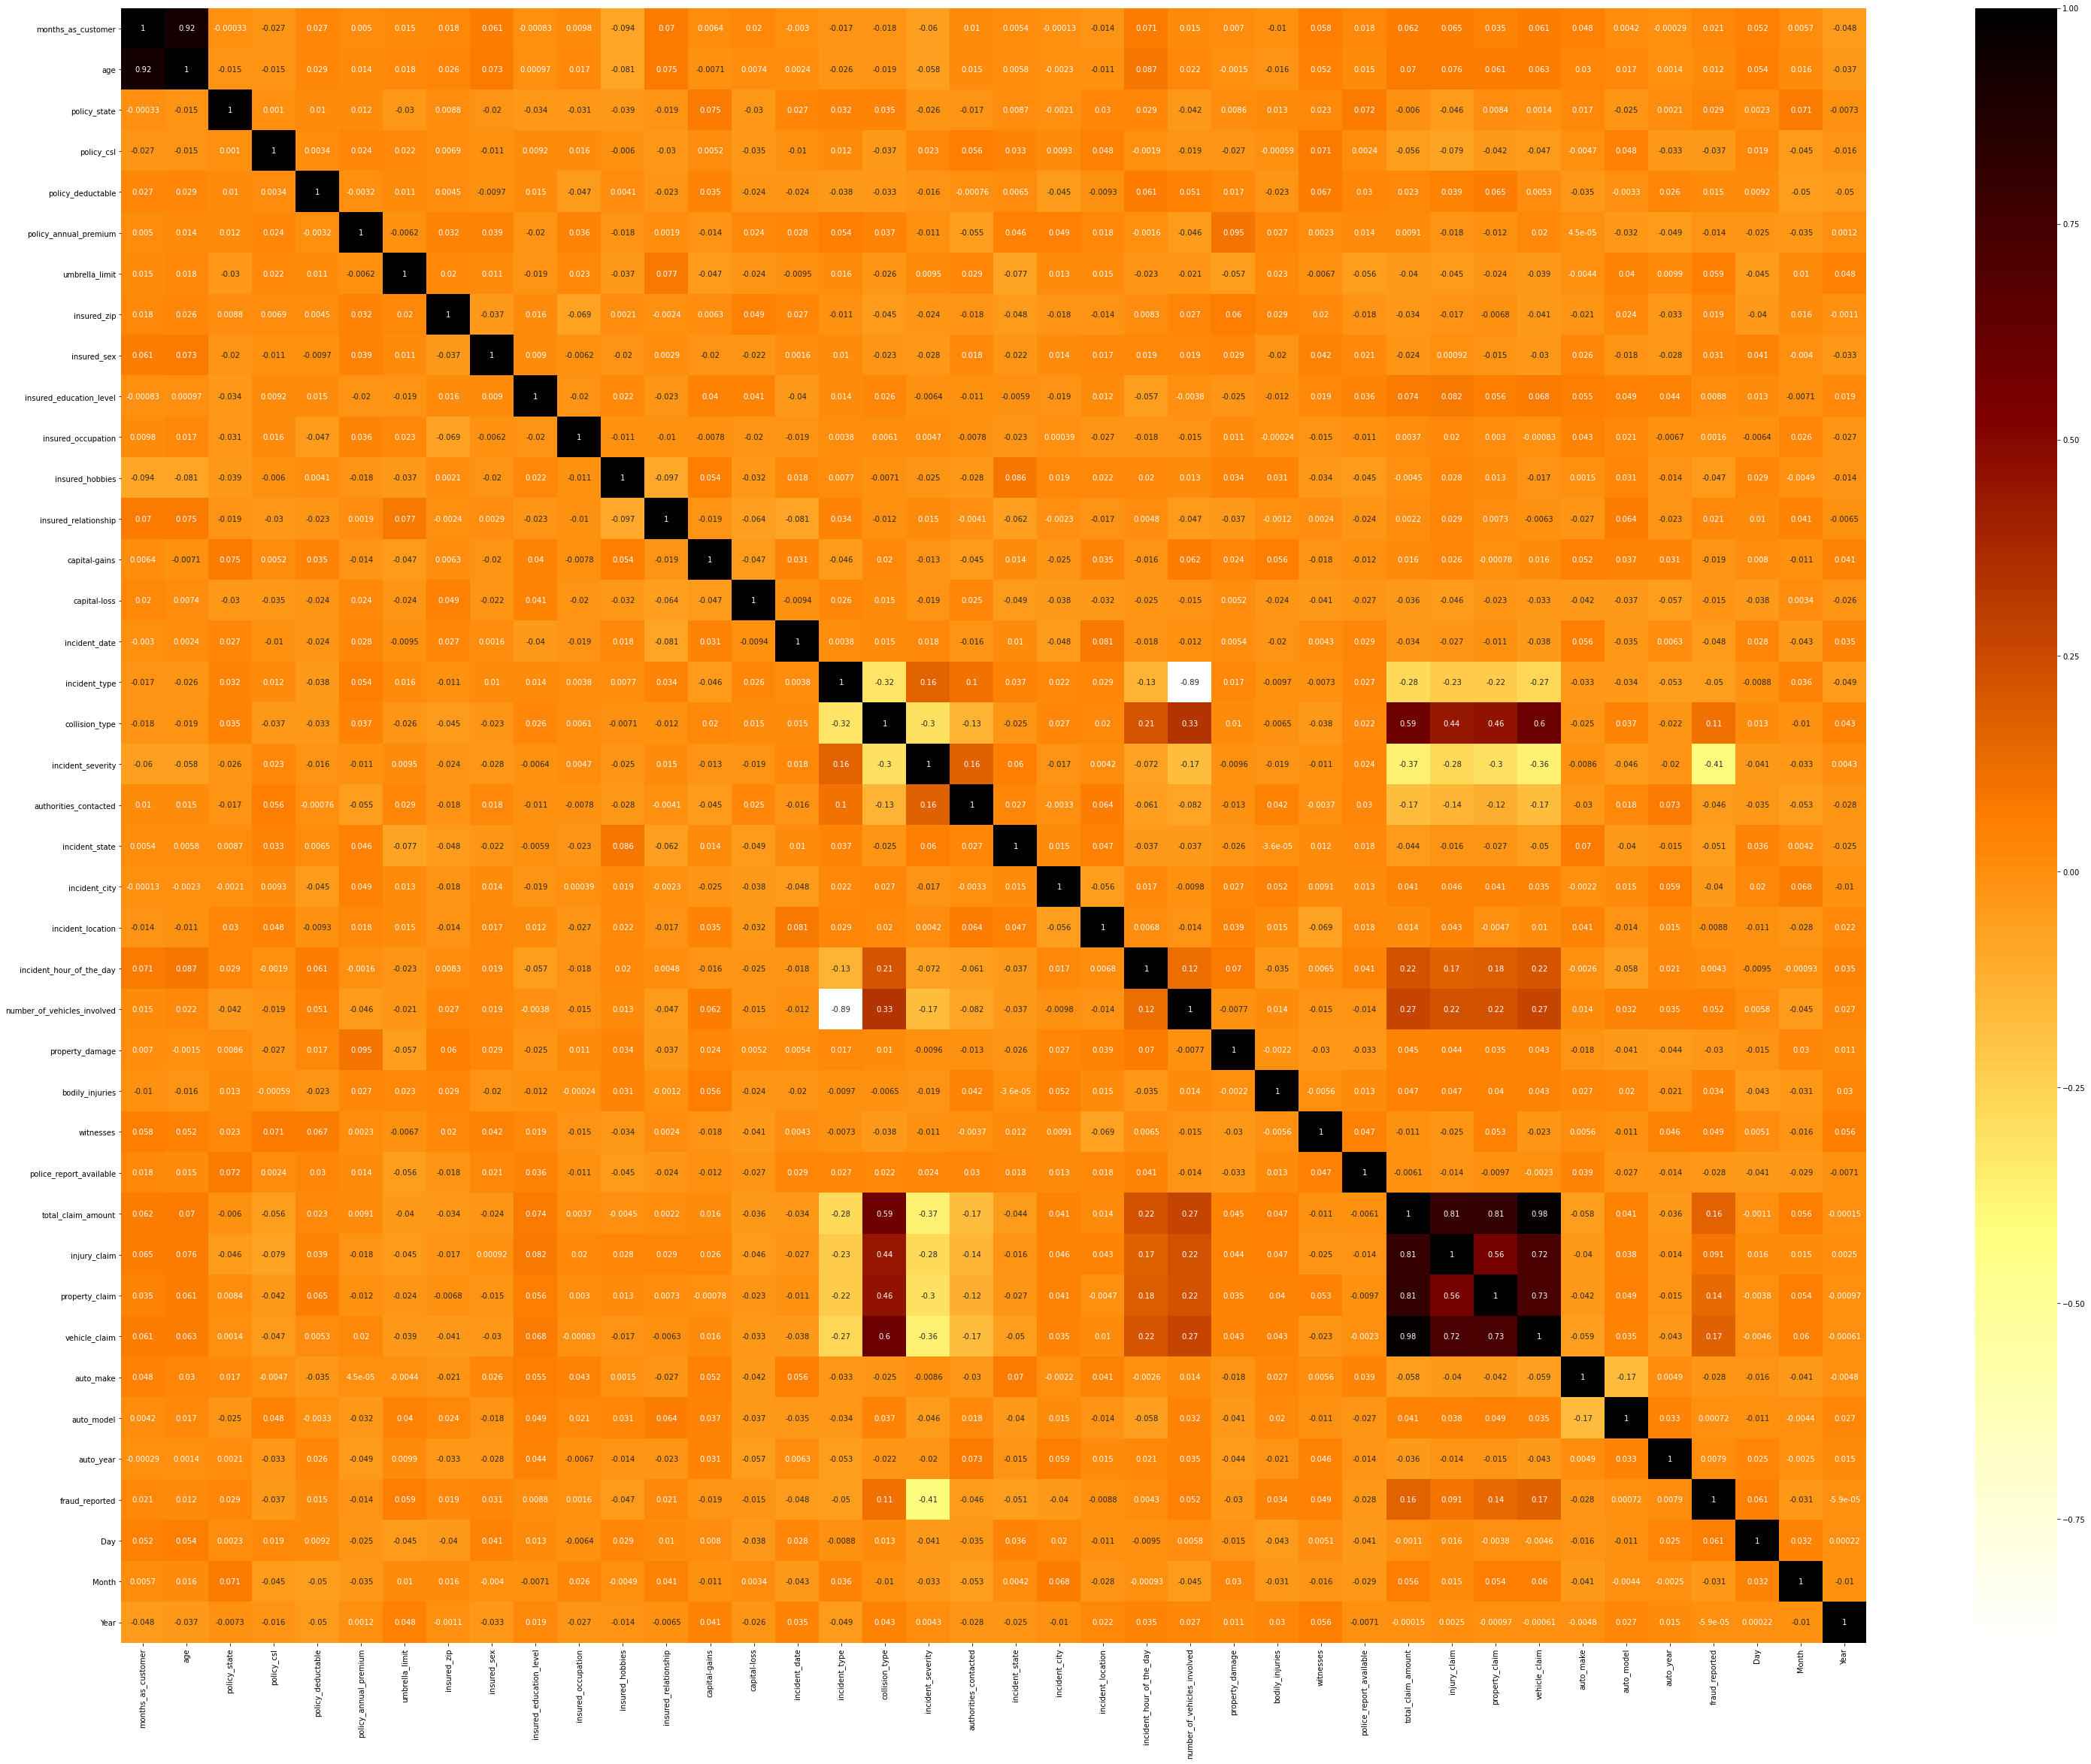

In [19]:
plt.figure(figsize=(52,40))
cor=df.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.afmhot_r)
plt.show()

In [20]:
cor["fraud_reported"].sort_values(ascending = False)

fraud_reported                 1.000000
vehicle_claim                  0.170049
total_claim_amount             0.163651
property_claim                 0.137835
collision_type                 0.110130
injury_claim                   0.090975
Day                            0.060643
umbrella_limit                 0.058622
number_of_vehicles_involved    0.051839
witnesses                      0.049497
bodily_injuries                0.033877
insured_sex                    0.030873
policy_state                   0.029432
insured_relationship           0.021043
months_as_customer             0.020544
insured_zip                    0.019368
policy_deductable              0.014817
age                            0.012143
insured_education_level        0.008808
auto_year                      0.007928
incident_hour_of_the_day       0.004316
insured_occupation             0.001564
auto_model                     0.000720
Year                          -0.000059
incident_location             -0.008832


##### Observation :
    "vehicle_claim" is highly correlated ,where "incident_severity" have
    least correlation with target variable

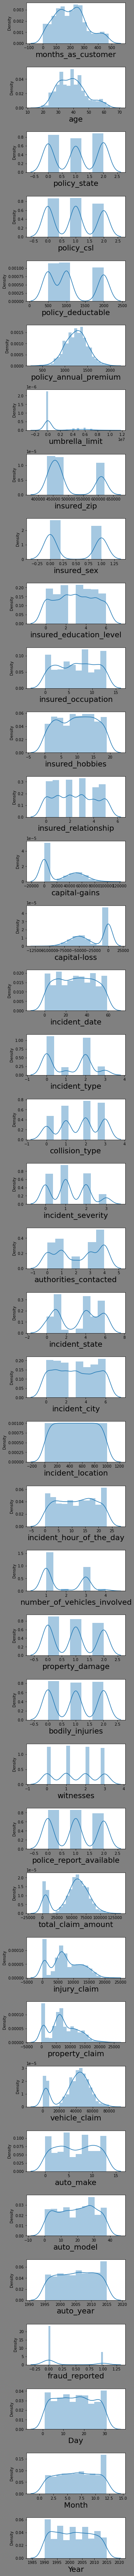

In [155]:
#let see how data is distribute in every column

plt.figure(figsize=(5,99),facecolor="grey")
plotnumber=1

for column in df:
    if plotnumber<=42:
        ax=plt.subplot(42,1,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [207]:
df.skew()

months_as_customer             0.362177
age                            0.478988
policy_state                  -0.026177
policy_csl                     0.088928
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_zip                    0.816554
insured_sex                    0.148630
insured_education_level       -0.000148
insured_occupation            -0.058881
insured_hobbies               -0.061563
insured_relationship           0.077488
capital-gains                  0.478850
capital-loss                  -0.391472
incident_date                  0.004756
incident_type                  0.101507
collision_type                -0.193345
incident_severity              0.279016
authorities_contacted         -0.121744
incident_state                -0.148865
incident_city                  0.049531
incident_location              0.000000
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664


In [22]:
#No need to visualize the lable's , seperating only features into new dataframe
df_label = df['fraud_reported']

df_feature = df.drop('fraud_reported',axis = 1)

In [23]:
#Check Data balancing
print("total Zero's(0) are",df_label.value_counts()[0])
print("total Zero's(1) are",df_label.value_counts()[1])

total Zero's(0) are 753
total Zero's(1) are 247


<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

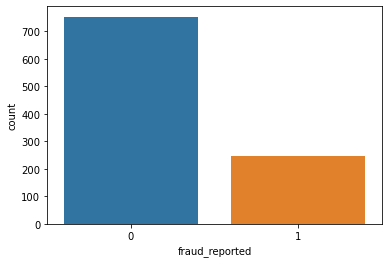

In [24]:
#plot
sns.countplot(df_label)

our data is imbalanced

###### For balancing data set we use upsampling technique

In [25]:
x = df[df.fraud_reported==0]
y = df[df.fraud_reported==1]

In [26]:
#checking train and test counts in given data set
print("Total no. of counts where claim is not Reported as fraud - ",x.shape)
print("Total no. of counts where claim is Reported as fraud -",y.shape)

Total no. of counts where claim is not Reported as fraud -  (753, 40)
Total no. of counts where claim is Reported as fraud - (247, 40)


In [27]:
#Targer Variable
y = df['fraud_reported']
# y=y[2:]
print(y.shape)

(1000,)


In [28]:
#dependant features
x = df.drop(columns = 'fraud_reported')
print(x.shape)

(1000, 39)


In [29]:
#split into train and test
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25)

In [30]:
#conacat train data features ad dependant variables
x=pd.concat([x_train,y_train],axis=1)

In [31]:
#shape after taking data for training 
nf_x=x[x.fraud_reported==0]
f_y=x[x.fraud_reported==1]

print(nf_x.shape)
print(f_y.shape)

(560, 40)
(190, 40)


In [32]:
#upsampling
fd_upsampling = resample(f_y,replace = True,n_samples = len(nf_x),random_state = 20)

In [33]:
fd_upsampling.shape

(560, 40)

In [34]:
#concat majority and upsampled minority
upsampled=pd.concat([fd_upsampling,nf_x])

In [35]:
upsampled.shape

(1120, 40)

In [57]:
#seperating target and independant variables
y=upsampled['fraud_reported']
x=upsampled.drop(columns = ['fraud_reported'])

In [58]:
print(x.shape)
print(y.shape)

(1120, 39)
(1120,)


#### For Feature Selection We use VIF

Now we process by checking the muticolliniarity in the dependant vaiable before that we should scale our data 

In [38]:
#Scaled all required features
scalar = StandardScaler()
x_scaled = scalar.fit_transform(x)

In [39]:
vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(x_scaled, i) for i in range(x_scaled.shape[1])]
vif["Features"] = df_feature.columns

In [40]:
vif

,vif,Features
0,6.814537,months_as_customer
1,6.832793,age
2,1.090503,policy_state
3,1.064409,policy_csl
4,1.091096,policy_deductable
5,1.085366,policy_annual_premium
6,1.077912,umbrella_limit
7,1.099858,insured_zip
8,1.077936,insured_sex
9,1.063919,insured_education_level


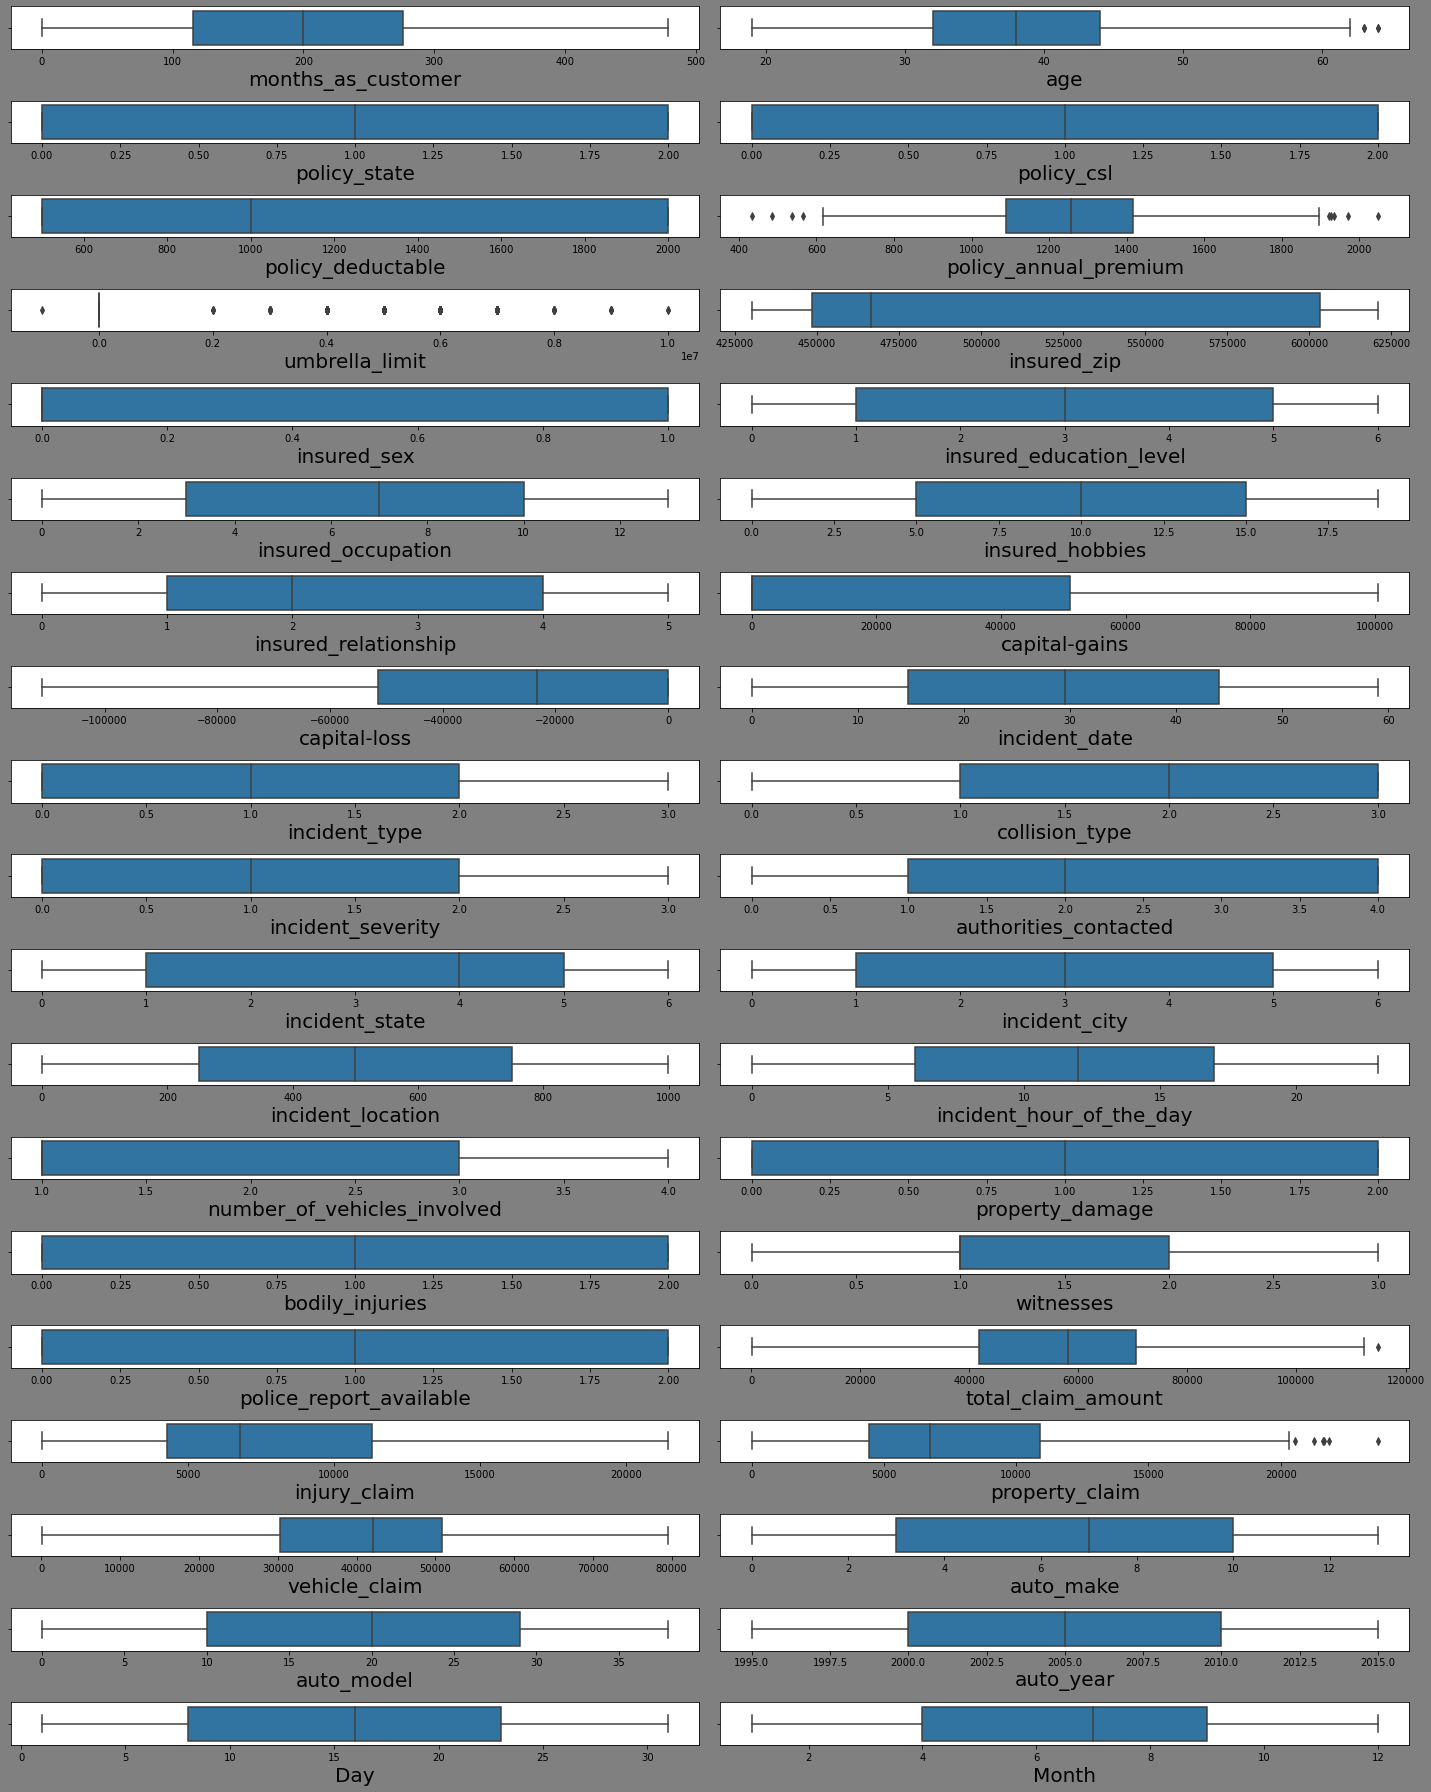

In [41]:
#let see how data is distribute in every column afte removing outliers by using IQR method

plt.figure(figsize=(20,25),facecolor="grey")
plotnumber=1

for column in df_feature:
    if plotnumber<=38:
        ax=plt.subplot(19,2,plotnumber)
        sns.boxplot(df_feature[column],orient='v')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

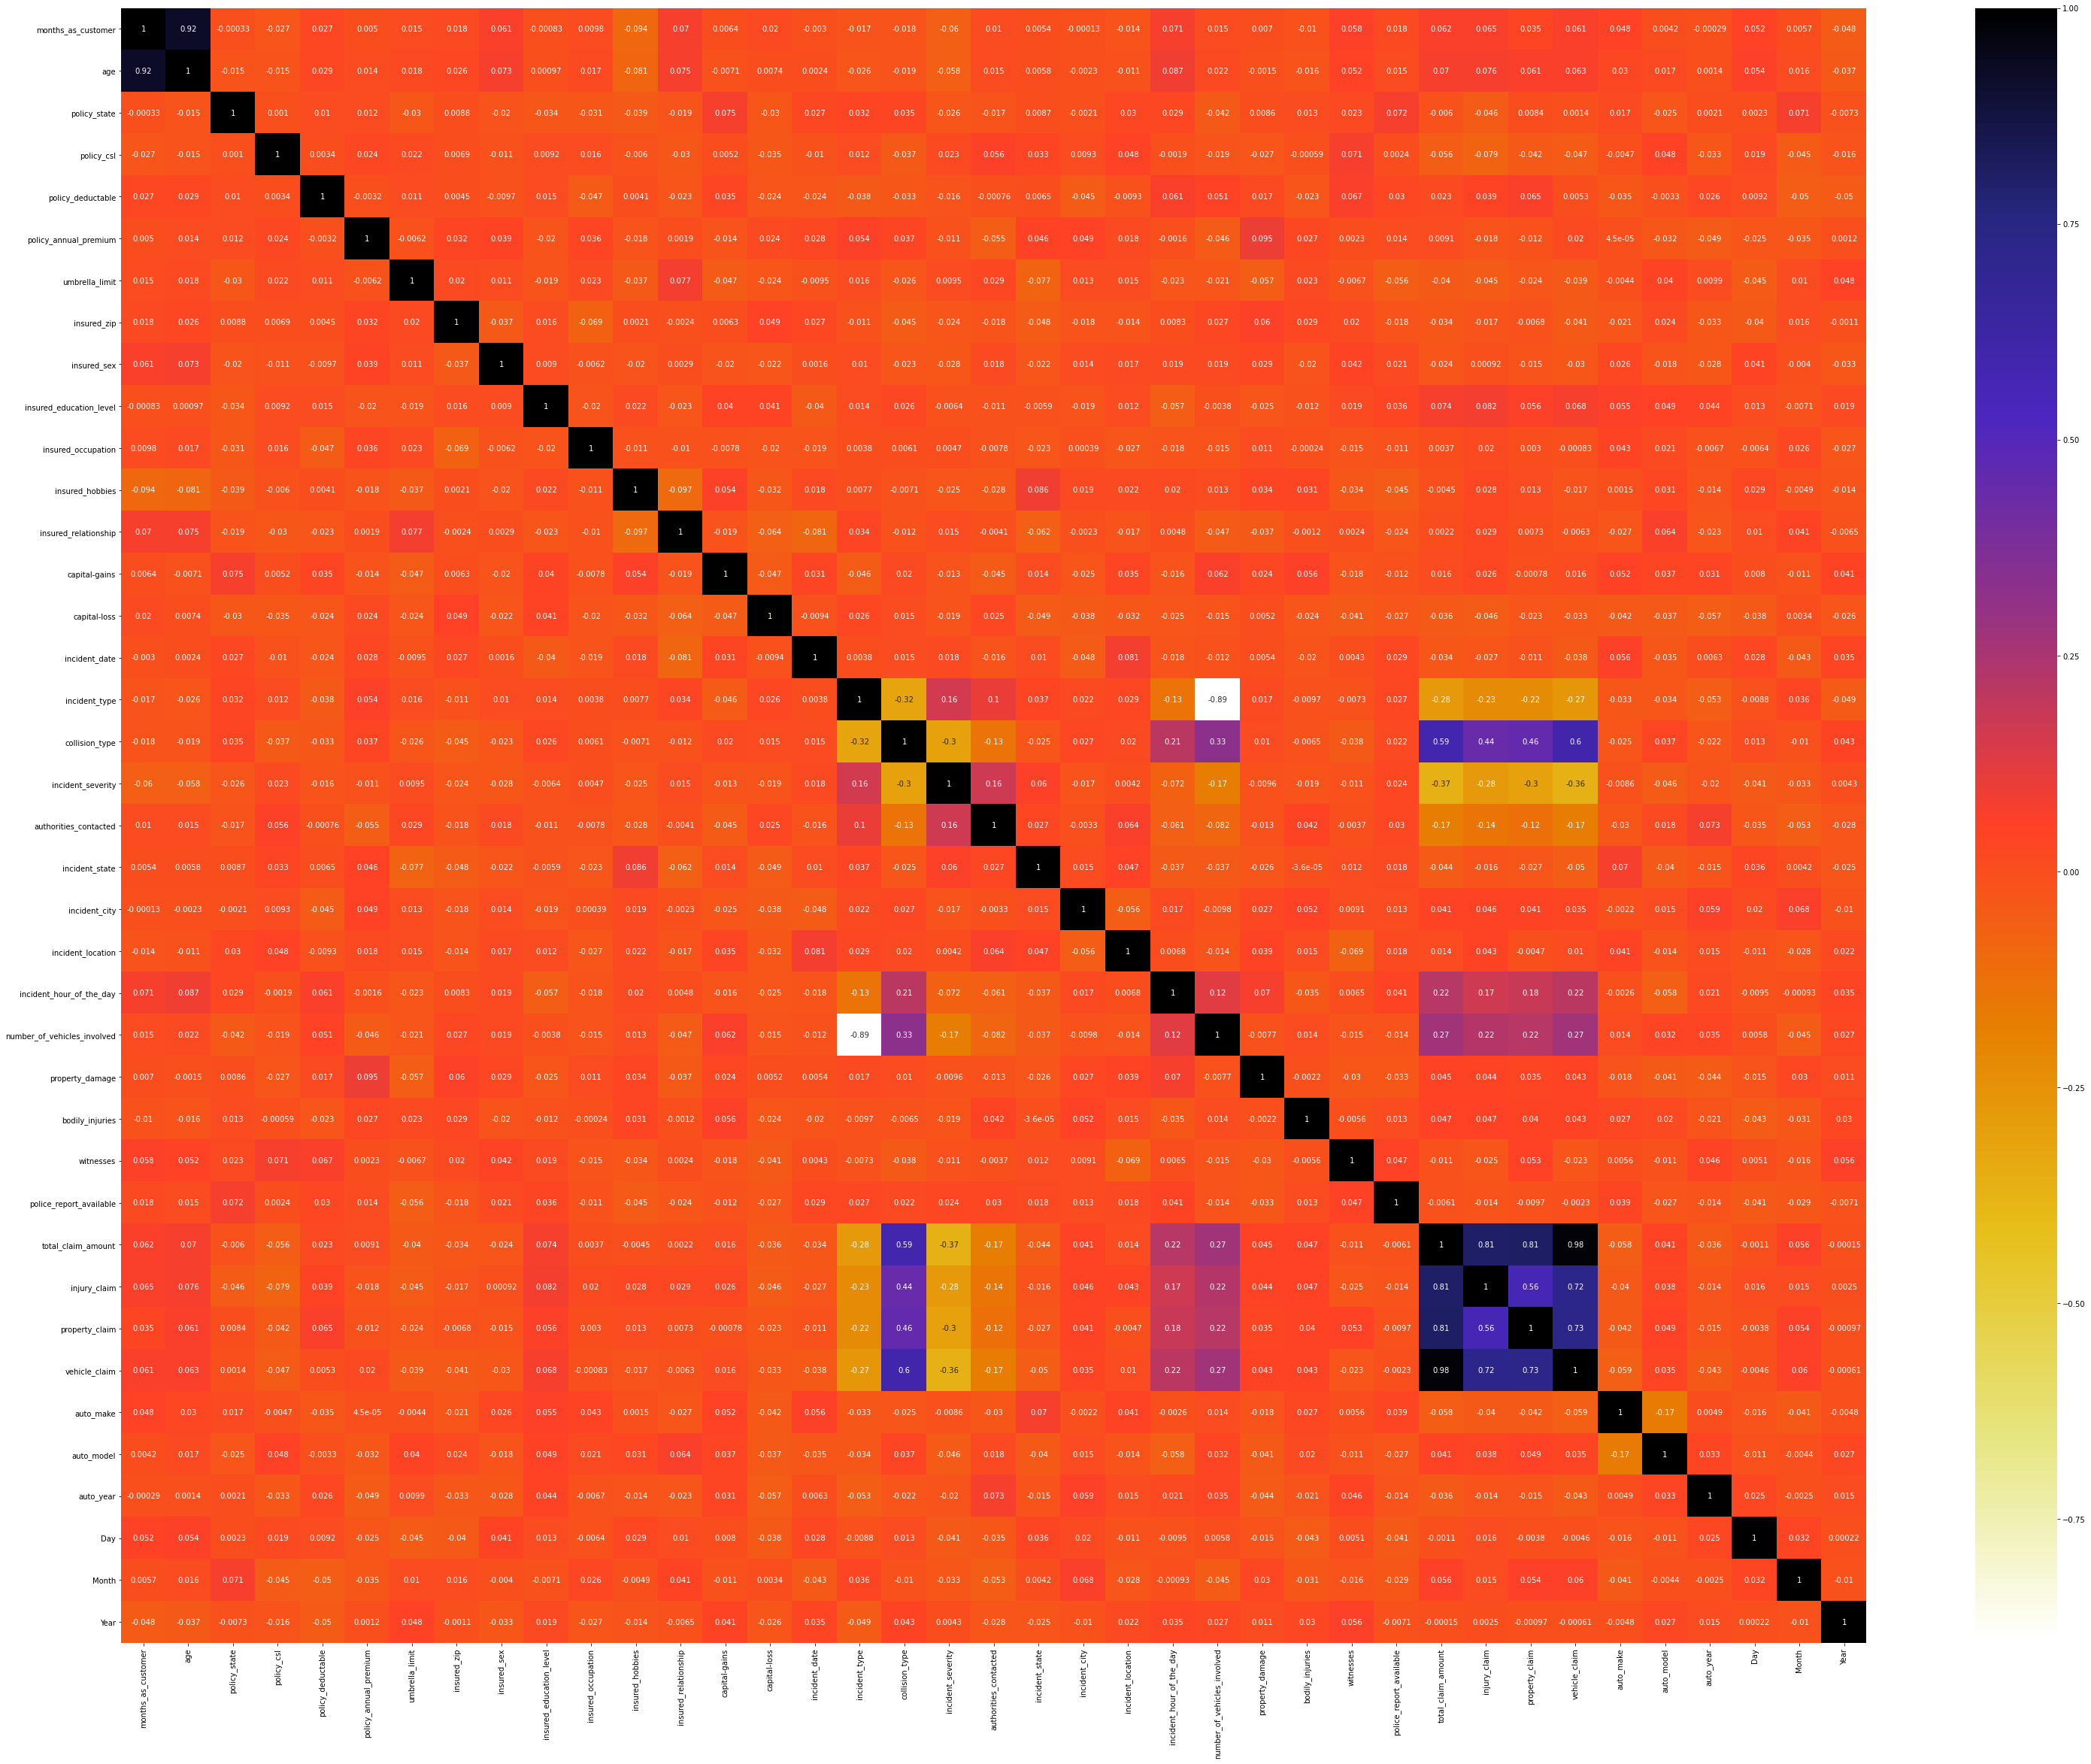

In [42]:
#Using  Person Correlation
plt.figure(figsize=(52,40))
cor=df_feature.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.CMRmap_r)
plt.show()

In [59]:
def correlation(dataset,threshold):
    col_corr = set()#set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:#absolute coefficient value
                columne=corr_matrix.columns[i]
                col_corr.add(columne)
    return col_corr

In [60]:
corr_features = correlation(x,0.8)
len(set(corr_features))

3

In [61]:
corr_features

{'age', 'number_of_vehicles_involved', 'vehicle_claim'}

In [62]:
x1=x.drop(corr_features,axis=1)

### Apply  Different algorithms on data to find the best accuracy score

In [140]:
#Along wit all features

In [121]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=623)
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)
print(accuracy_score(y_test,y_pred)*100)

96.42857142857143


In [122]:
Train_accurecy = accuracy_score(y_train,dt.predict(x_train))
Test_accurecy = accuracy_score(y_test,y_pred)
print(Train_accurecy)
print(Test_accurecy)

1.0
0.9642857142857143


In [123]:
from sklearn.model_selection import KFold,cross_val_score

In [124]:
#checking score with CV
cv_score = cross_val_score(dt,x,y,cv = 5)
cv_mean=cv_score.mean()
print(f"at cross foald {5} the cv score is {cv_mean} and accuracy for training is {Train_accurecy} and accurecy for testing is {Test_accurecy}")
print("\n")

at cross foald 5 the cv score is 0.90625 and accuracy for training is 1.0 and accurecy for testing is 0.9642857142857143




In [125]:
#Trying to check the result by using different metrics 

In [126]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96       112
           1       0.93      1.00      0.97       112

    accuracy                           0.96       224
   macro avg       0.97      0.96      0.96       224
weighted avg       0.97      0.96      0.96       224



In [127]:
print(confusion_matrix(y_test,y_pred))

[[104   8]
 [  0 112]]


### Observation:
    we are getting satisfactory result when we checked with Confusion_matrix by using DT Algo. for training and testing.CV is giving about 90% accurecy but even if we consider confusion metrics we can find that model almost correctly predicted TP and TN ,where FP & FN are less.

#GridSearch CV

In [80]:
parameters = {'min_samples_split':range(10,14),'min_samples_leaf':range(4,8),'max_depth':range(2,9)}
DC=DecisionTreeClassifier()
clf = GridSearchCV(DC,parameters)
clf.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(2, 9),
                         'min_samples_leaf': range(4, 8),
                         'min_samples_split': range(10, 14)})

In [81]:
print(clf.best_params_)

{'max_depth': 3, 'min_samples_leaf': 7, 'min_samples_split': 10}


In [100]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=623)
DT=DecisionTreeClassifier(max_depth=3,min_samples_leaf=7,min_samples_split=10)
DT.fit(x_train,y_train)
y_pred = DT.predict(x_test)
print(accuracy_score(y_test,y_pred)*100)

89.28571428571429


In [101]:

cv_score = cross_val_score(dt,x,y,cv = 5)
cv_mean=cv_score.mean()
print(f"at cross foald {5} the cv score is {cv_mean} and accuracy for training is {Train_accurecy} and accurecy for testing is {Test_accurecy}")
print("\n")

at cross foald 5 the cv score is 0.9160714285714286 and accuracy for training is 1.0 and accurecy for testing is 0.9553571428571429




In [110]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[104,   8],
       [  1, 111]], dtype=int64)

finalizing dt model which given us ood score as well as godd result in terms of confusion metrics s compare to second model with GSCV

##### Find evolution O/p by slicing confusion metrix

In [129]:
t_p=conf_mat[0][0]
f_p=conf_mat[0][1]
f_n=conf_mat[1][0]
t_n=conf_mat[1][1]

In [130]:
precision = t_p/(t_p+f_p)
precision

0.9285714285714286

In [131]:
recall = t_p/(t_p+f_n)
recall

0.9904761904761905

In [132]:
f1_score=2*(recall*precision) / (recall+precision)
f1_score

0.9585253456221199

In [133]:
auc = roc_auc_score(y_test,y_pred)

In [134]:
fpr,tpr,thresholds = roc_curve(y_test,y_pred)

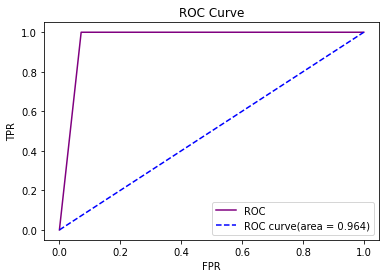

In [135]:
plt.plot(fpr,tpr,color='purple',label = 'ROC')
plt.plot([0,1],[0,1],color = 'blue',linestyle='--',label='ROC curve(area = %0.3f)'%auc)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.legend()
plt.show()

Almost 96% area come under curve along with 96% accurecy score

In [136]:
#saving model
import pickle
filename = 'claimfraud.pkl'
pickle.dump(dt,open(filename,'wb'))

conclusion

In [137]:
loaded_model = pickle.load(open('claimfraud.pkl','rb'))
result = loaded_model.score(x_test,y_test)
print(result)

0.9642857142857143


In [138]:
conclusion = pd.DataFrame([loaded_model.predict(x_test)[:],y_pred[:]],index=["predict","original"])

In [139]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,214,215,216,217,218,219,220,221,222,223
predict,0,1,1,0,0,0,1,1,0,1,...,1,0,0,1,1,1,1,1,0,1
original,0,1,1,0,0,0,1,1,0,1,...,1,0,0,1,1,1,1,1,0,1
